In [7]:
import numpy as np
import matplotlib.pyplot as plt


def proba(x_value, sigma):
    return np.exp(-0.5*(x_value/sigma)**2) * (1/np.sqrt(2.0 * np.pi * sigma**2))

def likelihood(x_values, sigma):
    like = (1.0/9.0)*sigma/sigma # esto me asegura de tener like del mismo tipo que sigma
    for x in x_values:
        #print(like)
        like = like * proba(x, sigma)
    return like

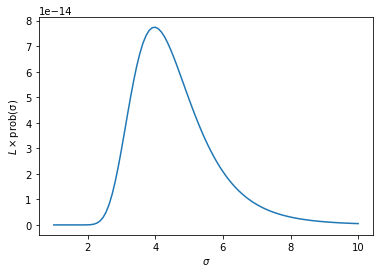

In [8]:
# carga los datos observacionales
x_data = np.loadtxt('https://raw.githubusercontent.com/ComputoCienciasUniandes/FISI2028-201920/master/ejercicios/14/valores.txt')

#primera grafica
n_points = 100
sigma = np.linspace(1,10,n_points)
l = likelihood(x_data, sigma)
plt.figure()
plt.plot(sigma,l)
plt.xlabel(r"$\sigma$")
plt.ylabel(r"$L\times {\rm{prob} (\sigma)}$")
plt.savefig("like.png")

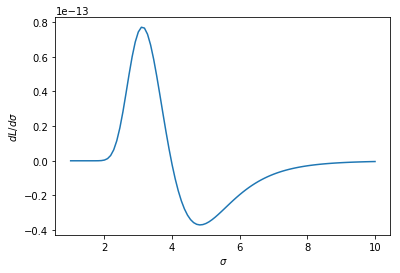

In [9]:
def derivada_likelihood(x_values, sigma):
    delta_sigma = 0.001
    d = likelihood(x_values, sigma+delta_sigma) - likelihood(x_values, sigma-delta_sigma)
    return d/(2.0*delta_sigma)

# Segunda grafica

like_prime = derivada_likelihood(x_data, sigma)
plt.figure()
plt.plot(sigma, like_prime)
plt.xlabel(r"$\sigma$")
plt.ylabel(r"$dL/d\sigma$")
plt.savefig("like_prime.png")

In [10]:
# para encontrar el cero defino la segunda derivada

def segunda_derivada_likelihood(x_values, sigma):
    delta_sigma = 0.001
    d = derivada_likelihood(x_values, sigma+delta_sigma) - derivada_likelihood(x_values, sigma-delta_sigma)
    return d/(2.0*delta_sigma)

def cero_derivada_likelihood(x_values, sigma_init):
    sigma_cero = sigma_init
    while np.abs(derivada_likelihood(x_values, sigma_cero)) > 1E-20:
        sigma_cero -= derivada_likelihood(x_values, sigma_cero)/segunda_derivada_likelihood(x_values, sigma_cero)
    return sigma_cero

sigma_cero = cero_derivada_likelihood(x_data, 4.0)
print('sigma_cero : {}'.format(sigma_cero))

sigma_cero : 3.9760526209641522


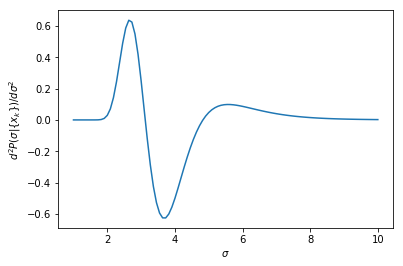

In [24]:
# Tercera Grafica

# para encontrar la normalizacion adecuada debo integrar la likelihood
def integral_likelihood(x_values, sigma_min, sigma_max):
    n_points = 1000
    s = np.linspace(sigma_min, sigma_max, n_points)
    l = likelihood(x_values, s)
    delta_s = s[1]-s[0]
    w = np.ones(n_points) * delta_s
    w[0] = delta_s/2
    w[-1] = delta_s/2
    return(np.sum(l*w))

d2_like = segunda_derivada_likelihood(x_data, sigma)
norma_likelihood = integral_likelihood(x_data, 1.0, 10.0)
plt.figure()
plt.plot(sigma, d2_like/norma_likelihood)
plt.xlabel(r"$\sigma$")
plt.ylabel(r"$d^2P(\sigma|\{x_k\})/d\sigma^2$")
plt.savefig("like_prime_prime.png")

In [27]:
delta_sigma_cero = -segunda_derivada_likelihood(x_data, sigma_cero)/norma_likelihood
print('Delta sigma_0 : {}'.format(delta_sigma_cero))

Delta sigma_0 : 0.5169802461512616


0.009009009009008917


1.8945937199066907e-13